### Fetching Abalone Data

In [1]:
import pandas as pd
abalone_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names =  ["Sex", "Length", "Diameter", "Height", 
          "Whole Weight", "Shucked Weight", "Viscera Weight", 
          "Shell Weight", "Rings"]
abalone_df = pd.read_csv(abalone_data, 
                      header=None, 
                      names = names)                                      

In [2]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Pairplot of Abalone Data with Hue equal to sex (M, F, I)

In [3]:
import seaborn as sns
%matplotlib inline

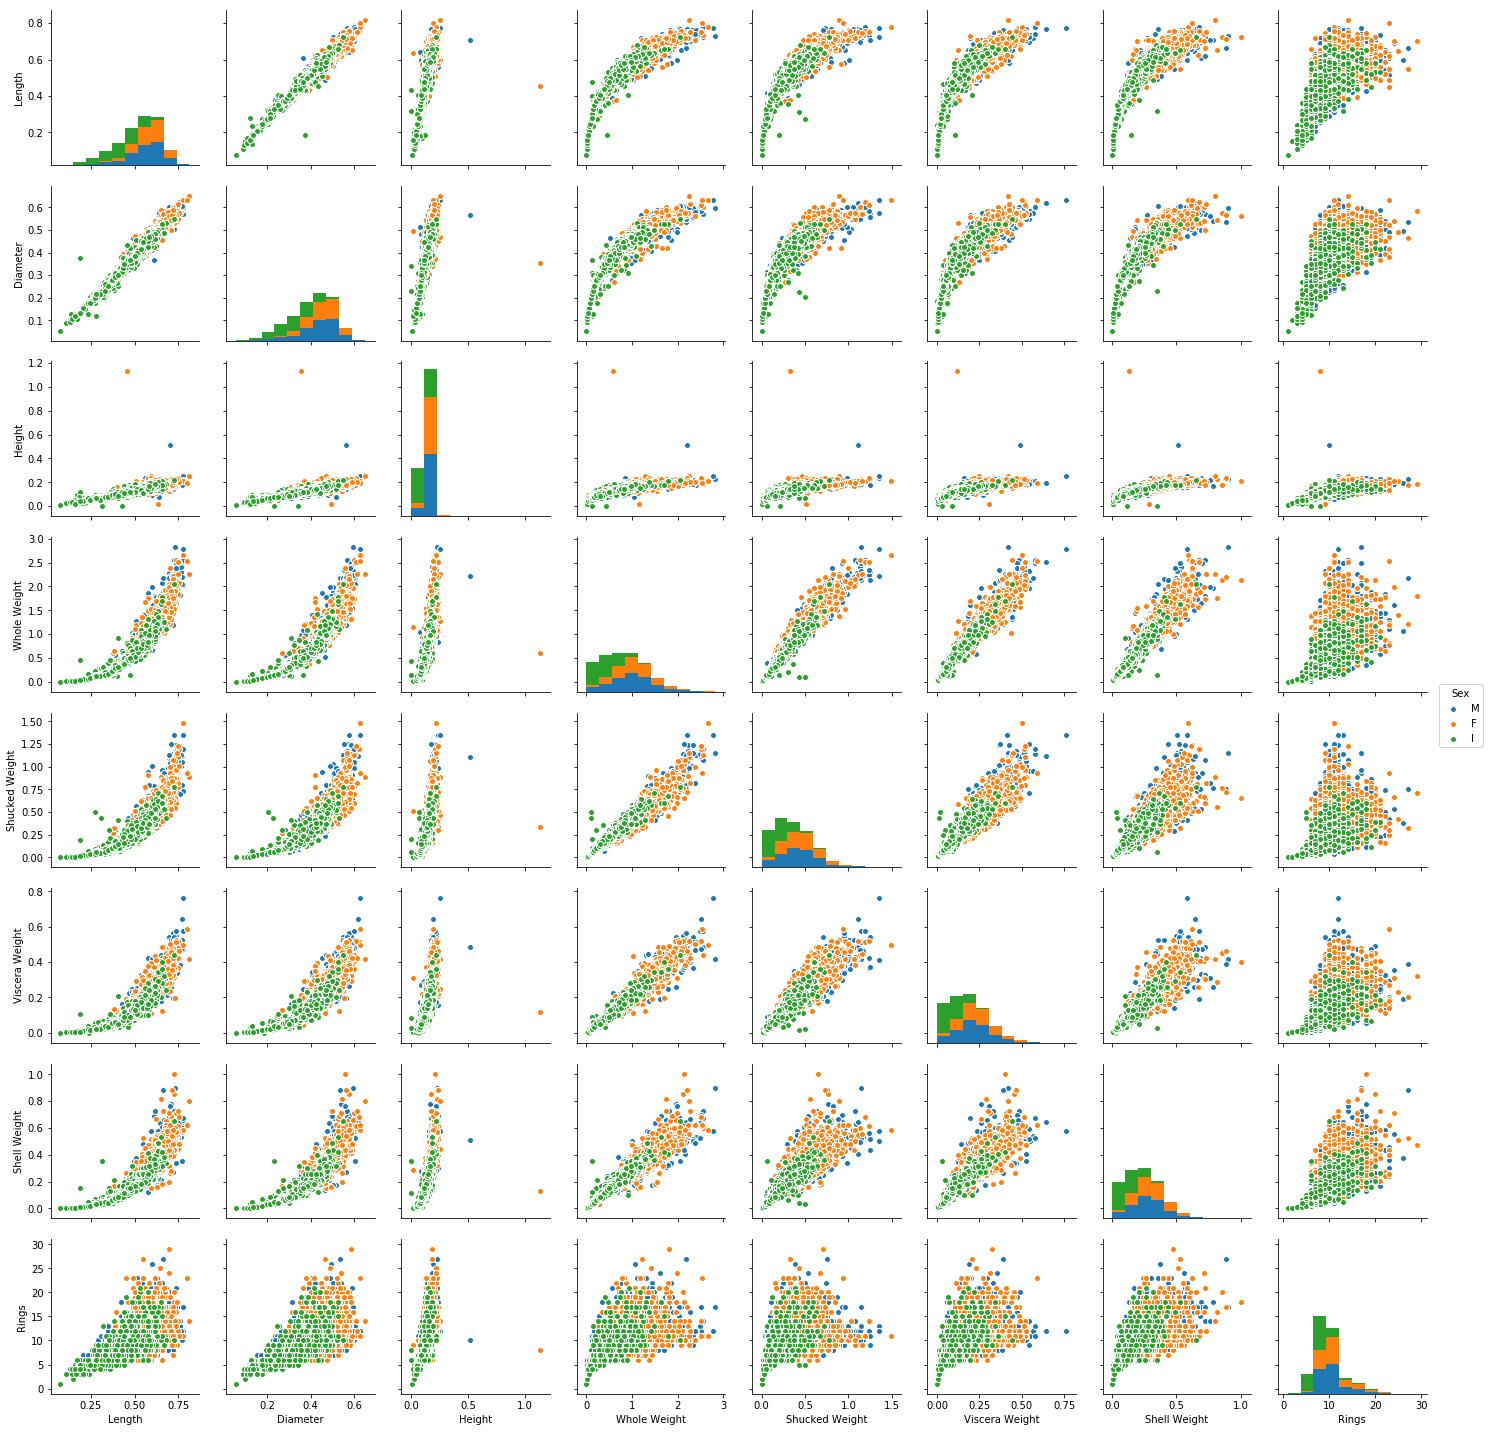

In [19]:
sns.pairplot(data=abalone_df, hue="Sex")

### Correlation Heatmap

In [5]:
corr = abalone_df.corr()

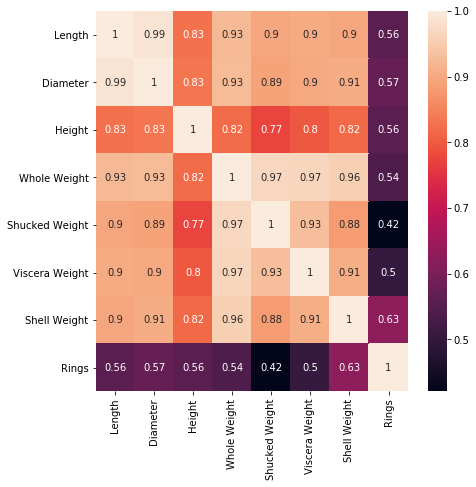

In [6]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(7,7))
sns.heatmap(corr, annot=True)

## Plot rings by gender
You may want to check this out:

https://rpubs.com/justmarkham/abalone-ggplot2


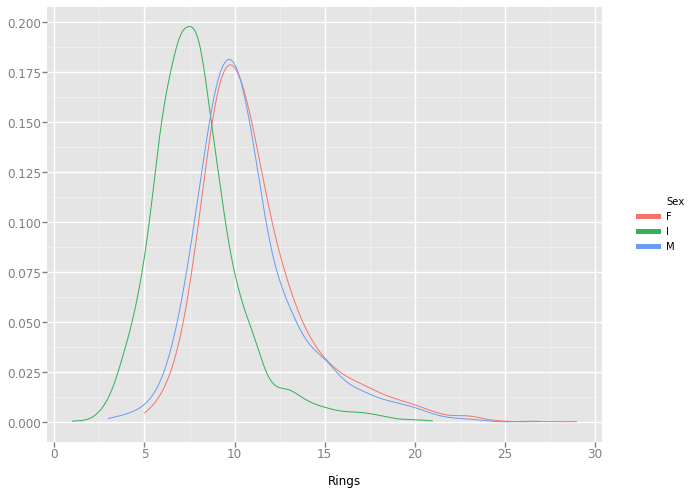

<ggplot: (-9223372036553313760)>

In [18]:
from ggplot import *
ggplot(abalone_df,aes(x="Rings", color = "Sex")) + geom_density(position = "stack")

### Some ideas for classification 
http://angusmacnab.com/Abalone_SKLearn_Tut_0.4.html (this is weird code though)

### This looks like a good example 
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Working SVC Classification Crude

In [37]:
y = abalone_df["Sex"]
x = abalone_df.drop("Sex", axis=1)
x.head()

# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.0001)
svc.fit(x, y)
svc.score(x,y)

0.5149628920277711

### Split Data into Test and Training Set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Train on split data (Fixed some overfitting)


In [42]:
svc = SVC(gamma=0.0001)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
svc.score(X_test,y_test)

0.5315445975344453

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

In [53]:
print(classification_report(y_test, predictions))


             precision    recall  f1-score   support

          F       0.48      0.30      0.37       419
          I       0.65      0.84      0.73       454
          M       0.50      0.52      0.51       506

avg / total       0.54      0.56      0.54      1379



In [54]:
print(confusion_matrix(y_test, predictions))

[[124  86 209]
 [ 16 383  55]
 [119 123 264]]
